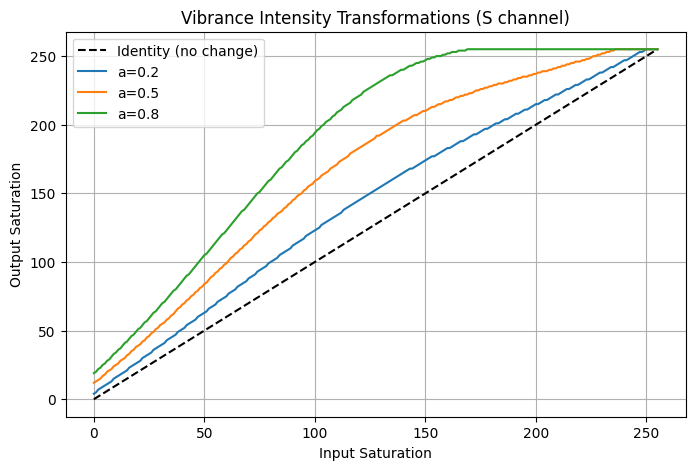

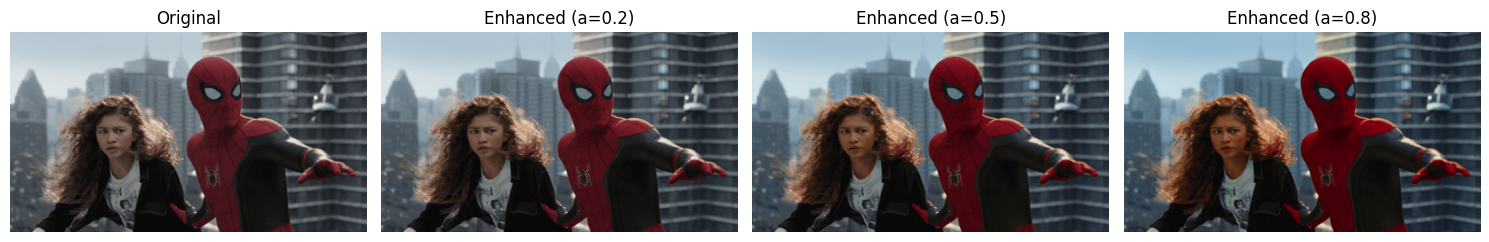

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

IMG = "spider.png"
bgr = cv2.imread(IMG)
if bgr is None:
    raise FileNotFoundError(IMG)

def vibrance_lut(a, sigma=70.0):
    x = np.arange(256, dtype=np.float32)
    bump = a * 128.0 * np.exp(-((x - 128.0) ** 2) / (2 * sigma**2))
    y = np.clip(x + bump, 0, 255)
    return y.astype(np.uint8)

A_VALUES = [0.2, 0.5, 0.8]
SIGMA = 70.0

# --- Plot intensity transformations ---
x = np.arange(256)
plt.figure(figsize=(8,5))
plt.plot(x, x, 'k--', label="Identity (no change)")
for a in A_VALUES:
    lut = vibrance_lut(a, SIGMA)
    plt.plot(x, lut, label=f"a={a}")
plt.title("Vibrance Intensity Transformations (S channel)")
plt.xlabel("Input Saturation")
plt.ylabel("Output Saturation")
plt.legend(); plt.grid(True); plt.show()

# --- Apply transformations and show images ---
hsv = cv2.cvtColor(bgr, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)

plt.figure(figsize=(15,5))
plt.subplot(1, len(A_VALUES)+1, 1)
plt.imshow(cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB))
plt.title("Original"); plt.axis("off")

for i, a in enumerate(A_VALUES, start=2):
    lut = vibrance_lut(a, SIGMA)
    s_enh = cv2.LUT(s, lut)
    hsv_enh = cv2.merge([h, s_enh, v])
    bgr_enh = cv2.cvtColor(hsv_enh, cv2.COLOR_HSV2BGR)
    
    plt.subplot(1, len(A_VALUES)+1, i)
    plt.imshow(cv2.cvtColor(bgr_enh, cv2.COLOR_BGR2RGB))
    plt.title(f"Enhanced (a={a})")
    plt.axis("off")

plt.tight_layout(); plt.show()
